In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.optimizers import SGD
import cv2
from sklearn import preprocessing

In [2]:
X_train=[]
y_train=[]
os.chdir('C:/Users/Harsh/Desktop/JUPYTER/DATASET/f')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)     
    img = cv2.resize(img,(128,128))
    X_train.append(img)
    y_train.append(i[0]) 

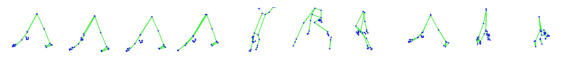

Label: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']


In [3]:
%matplotlib inline
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('Label: %s' % (y_train[0:10]))


In [5]:
X_test = []
y_test = []
os.getcwd()
os.chdir('C:/Users/Harsh/Desktop/JUPYTER/DATASET/g')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)   
    img = cv2.resize(img,(128,128))
    X_test.append(img)
    y_test.append(i[0]) 

In [6]:
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

print("Total categories: ", len(np.unique(y_train)))
print("Total categories: ", len(np.unique(y_test)))

Shape of an image in X_train:  (128, 128, 3)
Shape of an image in X_test:  (128, 128, 3)
Total categories:  2
Total categories:  2


In [7]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [8]:
y_train = np.array(y_train)
X_train = np.array(X_train)

y_test = np.array(y_test)
X_test = np.array(X_test)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (371, 128, 128, 3)
X_test Shape:  (169, 128, 128, 3)
y_train Shape:  (371, 2)
y_test Shape:  (169, 2)


In [9]:
handModel=Sequential()
handModel.add(BatchNormalization(input_shape = (128,128,3), name='batch_norm_0'))
handModel.add(Convolution2D(filters=16, kernel_size=3, padding='same', activation ='relu', input_shape = (128, 128, 3), name="conv_0")) 
handModel.add(MaxPooling2D(pool_size=2, name='max_pool_0'))
handModel.add(Convolution2D(filters=32,kernel_size=4,padding='same',activation='relu', name="conv_1"))
handModel.add(MaxPooling2D(pool_size=2, name='max_pool_1'))
handModel.add(Convolution2D(filters=32,kernel_size=3,padding='same',activation='relu', name="conv_2"))
handModel.add(MaxPooling2D(pool_size=2, name='max_pool_2'))
handModel.add(Convolution2D(filters=64,kernel_size=2,padding='same',activation='relu', name="conv_3"))
handModel.add(MaxPooling2D(pool_size=2, name='max_pool_3'))
handModel.add(Flatten()) 
handModel.add(Dense(units = 128,activation = 'relu'))
handModel.add(Dense(units = 64, activation = 'relu'))
handModel.add(Dense(units = 32, activation = 'relu'))
handModel.add(Dense(units = 2, activation = 'sigmoid'))

In [10]:
handModel.compile(optimizer='adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [13]:
model = handModel.fit(X_train, y_train, epochs=30 )

Epoch 1/30
12/12 [==============================] - 0s 25ms/step - loss: 0.0202 - accuracy: 0.9973
Epoch 2/30
12/12 [==============================] - 0s 24ms/step - loss: 0.0122 - accuracy: 0.9973
Epoch 3/30
12/12 [==============================] - 0s 24ms/step - loss: 0.0217 - accuracy: 0.9892
Epoch 4/30
12/12 [==============================] - 0s 24ms/step - loss: 0.0648 - accuracy: 0.9838
Epoch 5/30
12/12 [==============================] - 0s 24ms/step - loss: 0.1113 - accuracy: 0.9650
Epoch 6/30
12/12 [==============================] - 0s 24ms/step - loss: 0.0390 - accuracy: 0.9919
Epoch 7/30
12/12 [==============================] - 0s 24ms/step - loss: 0.0186 - accuracy: 0.9946
Epoch 8/30
12/12 [==============================] - 0s 24ms/step - loss: 0.0163 - accuracy: 0.9973
Epoch 9/30
12/12 [==============================] - 0s 24ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 10/30
12/12 [==============================] - 0s 24ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 11/

In [14]:
loss = handModel.evaluate(X_test,y_test)
print(loss)


6/6 [==============================] - 0s 6ms/step - loss: 0.2537 - accuracy: 0.9763
[0.2536677122116089, 0.976331353187561]


In [24]:
frame1 = cv2.imread("C:\\Users\\Harsh\\Desktop\\JUPYTER\\DATASET\\u0.jpg")     
#e = cv2.resize(e,(128,128))
frame1 = cv2.resize(frame1,(128,128))
frame1 = frame1.reshape(1,frame1.shape[0],frame1.shape[1],frame1.shape[2])
handModel.predict(frame1)


array([[1.1890929e-12, 1.0000000e+00]], dtype=float32)

In [25]:
predicted_classes = handModel.predict(frame1)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [26]:
print("Prediction:",predicted_classes)

Prediction: [1]


In [ ]:
import time
from directkeys import right_pressed, left_pressed
from directkeys import PressKey, ReleaseKey 
left_key=left_pressed
right_key=right_pressed
cap = cv2.VideoCapture(0)
time.sleep(5.0)
while(True):
    ret, frame1 = cap.read()
    ret, frame = cap.read()
    frame1=frame
    frame1 = cv2.flip(frame1, 1)
    font = cv2.FONT_HERSHEY_SIMPLEX 
    frame = cv2.resize(frame,(540,540))
    
    frame1 = cv2.resize(frame1,(128,128))
    frame1 = frame1.reshape(1,frame1.shape[0],frame1.shape[1],frame1.shape[2])
    predicted_classes = handModel.predict(frame1)
    predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
    print("Prediction:",predicted_classes)
    
    if predicted_classes==1 :
        cv2.putText(frame,'Acceleration',(50,50),font,1,(0,255,0),3)
        PressKey(right_key)
        time.sleep(0.1)
        ReleaseKey(right_key)
    else:
        cv2.putText(frame,'Break',(50,50),font,1,(0,0,255),3)
        PressKey(left_key)
        time.sleep(0.1)
        ReleaseKey(left_key)
        
    cv2.imshow("Live cam",frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()